In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import MeanSquaredError
import numpy as np
from sklearn.inspection import partial_dependence
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from keras.models import Model
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
!pip install nbconvert
!pip install seaborn


In [2]:
# Read the CSV file
# Load the data from the CSV file
df = pd.read_csv('/content/data.csv')

# Display the column names
column_names = df.columns
column_names


Index(['ID', 'air_time1', 'disp_index1', 'gmrt_in_air1', 'gmrt_on_paper1',
       'max_x_extension1', 'max_y_extension1', 'mean_acc_in_air1',
       'mean_acc_on_paper1', 'mean_gmrt1',
       ...
       'mean_jerk_in_air25', 'mean_jerk_on_paper25', 'mean_speed_in_air25',
       'mean_speed_on_paper25', 'num_of_pendown25', 'paper_time25',
       'pressure_mean25', 'pressure_var25', 'total_time25', 'class'],
      dtype='object', length=452)

In [6]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 ID                 0
air_time1          0
disp_index1        0
gmrt_in_air1       0
gmrt_on_paper1     0
                  ..
paper_time25       0
pressure_mean25    0
pressure_var25     0
total_time25       0
class              0
Length: 452, dtype: int64


In [9]:
print("Data types of each column:\n", df.dtypes)


Data types of each column:
 ID                   object
air_time1             int64
disp_index1         float64
gmrt_in_air1        float64
gmrt_on_paper1      float64
                     ...   
paper_time25          int64
pressure_mean25     float64
pressure_var25      float64
total_time25          int64
class              category
Length: 452, dtype: object


In [11]:

# Identify the string columns
string_columns = dtypes[dtypes == 'object'].index
# Display the string columns
print("String Columns:", string_columns)

String Columns: Index(['ID'], dtype='object')


In [12]:
import pandas as pd

# Assuming 'df' is DataFrame and 'string_columns' is the list of string columns
for column in string_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Optional: Check for missing values after conversion
missing_values_post_conversion = df[string_columns].isnull().sum()
print("Missing values after conversion:\n", missing_values_post_conversion)

# Optional: Confirm new data types
print("New data types:\n", df[string_columns].dtypes)


Missing values after conversion:
 ID    174
dtype: int64
New data types:
 ID    float64
dtype: object


In [13]:
# Assuming 'df' is DataFrame and 'ID' is the column of interest

# First, revert the 'ID' column back to its original string type
df['ID'] = df['ID'].astype('object')

# Then, create a mask for non-numeric values
mask = pd.to_numeric(df['ID'], errors='coerce').isna()

# Display a sample of non-numeric values from the 'ID' column
non_numeric_values = df['ID'][mask]
print("Sample of non-numeric values in the 'ID' column:\n", non_numeric_values.head())


Sample of non-numeric values in the 'ID' column:
 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: ID, dtype: object


In [15]:
# Fill with a placeholder value
df['ID'].fillna('missing', inplace=True)

# Fill with forward fill
df['ID'].fillna(method='ffill', inplace=True)

# Fill with backward fill
df['ID'].fillna(method='bfill', inplace=True)

# Remove rows with missing ID values
df.dropna(subset=['ID'], inplace=True)

# Create new unique IDs for missing values
missing_mask = df['ID'].isna()
df.loc[missing_mask, 'ID'] = range(1, missing_mask.sum() + 1)


In [16]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 ID                 0
air_time1          0
disp_index1        0
gmrt_in_air1       0
gmrt_on_paper1     0
                  ..
paper_time25       0
pressure_mean25    0
pressure_var25     0
total_time25       0
class              0
Length: 452, dtype: int64


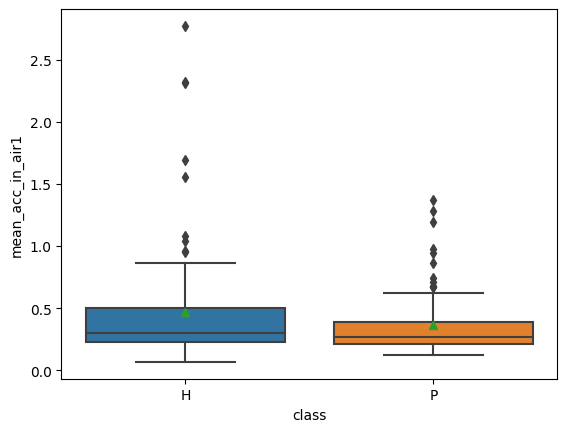

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [18]:
# Boxplot of the mean acceleration in the air for healthy and Alzheimer's disease patients
sns.boxplot(
    x = 'class',
    y = 'mean_acc_in_air1',
    showmeans=True,
    data=df
)
plt.show()
# Set the figure size
plt.figure(figsize=(6, 4))


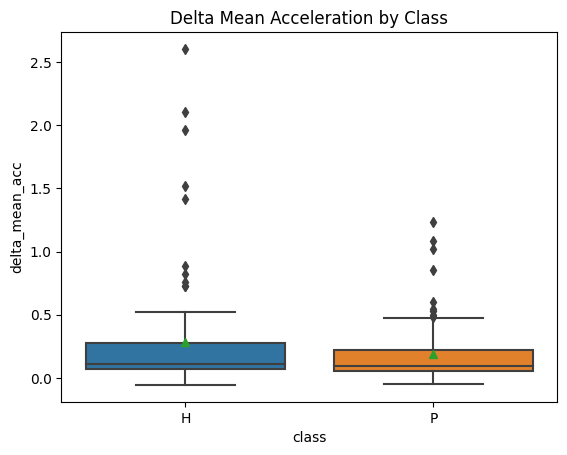

In [20]:
# Create a new feature that is the difference between the mean acceleration in the air and the mean acceleration on paper
df['delta_mean_acc'] = df['mean_acc_in_air1'] - df['mean_acc_on_paper1']

# Plot the delta mean acceleration for healthy and Alzheimer's disease patients
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    x='class',
    y='delta_mean_acc',
    showmeans=True,
    data=df
)
plt.title('Delta Mean Acceleration by Class')
plt.show()


In [21]:
# Calculate the correlation between the target variable and other variables
correlation = df.corr()

# Print the correlation matrix
print(correlation)

                  air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  \
air_time1          1.000000     0.361259     -0.232732       -0.207819   
disp_index1        0.361259     1.000000     -0.246372       -0.385838   
gmrt_in_air1      -0.232732    -0.246372      1.000000        0.587802   
gmrt_on_paper1    -0.207819    -0.385838      0.587802        1.000000   
max_x_extension1   0.225954     0.127803      0.133476        0.245255   
...                     ...          ...           ...             ...   
paper_time25       0.110482     0.153675     -0.170229       -0.076708   
pressure_mean25   -0.041226    -0.111902      0.088930        0.113275   
pressure_var25     0.091019     0.066591     -0.119840       -0.045748   
total_time25       0.018695     0.097970     -0.084335       -0.093643   
delta_mean_acc     0.146427    -0.091131      0.274306        0.151543   

                  max_x_extension1  max_y_extension1  mean_acc_in_air1  \
air_time1                 0.225954   

<ipython-input-21-25171f33d2fa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.3, random_state=42)


In [24]:
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['ID'], dtype='object')


In [26]:
from sklearn.preprocessing import LabelEncoder

for column in non_numeric_columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column].astype(str))
    X_test[column] = le.transform(X_test[column].astype(str))


In [27]:
from sklearn.metrics import classification_report

# Train the models on the selected features
for model_name, model in models.items():
    model.fit(X_train, y_train)

# Evaluate the models on the test set
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'{model_name} classification report:')
    print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression classification report:
              precision    recall  f1-score   support

           H       0.83      0.86      0.84        28
           P       0.83      0.80      0.82        25

    accuracy                           0.83        53
   macro avg       0.83      0.83      0.83        53
weighted avg       0.83      0.83      0.83        53

Random Forest Classifier classification report:
              precision    recall  f1-score   support

           H       0.89      0.86      0.87        28
           P       0.85      0.88      0.86        25

    accuracy                           0.87        53
   macro avg       0.87      0.87      0.87        53
weighted avg       0.87      0.87      0.87        53

Decision Tree Classifier classification report:
              precision    recall  f1-score   support

           H       0.82      0.64      0.72        28
           P       0.68      0.84      0.75        25

    accuracy                           0.74

In [29]:
from sklearn.metrics import classification_report

# Assuming you have already trained models and have predictions
classification_reports = []
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append({model_name: report})


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


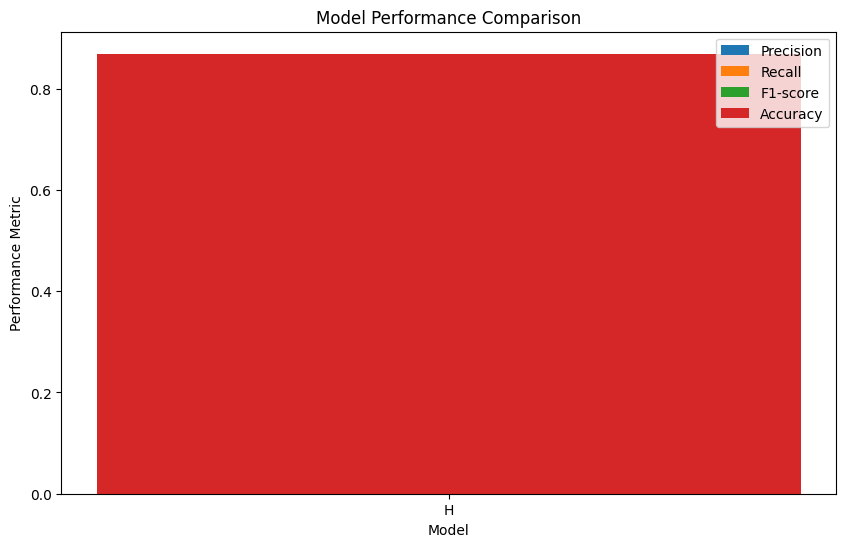

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Train the models on the selected features
for model_name, model in models.items():
    model.fit(X_train, y_train)

# Evaluate the models on the test set
classification_reports = []
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    classification_report_dict = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(classification_report_dict)

# Get the model names from the classification reports
model_names = []
for model_report in classification_reports:
    model_names.append(list(model_report.keys())[0])

# Get the performance metrics
precisions = []
recalls = []
f1_scores = []
accuracies = []

for model_report in classification_reports:
    precisions.append(model_report['weighted avg']['precision'])
    recalls.append(model_report['weighted avg']['recall'])
    f1_scores.append(model_report['weighted avg']['f1-score'])
    accuracies.append(model_report['accuracy'])

# Create a bar chart of the model performance metrics
plt.figure(figsize=(10, 6))

plt.bar(model_names, precisions, label='Precision')
plt.bar(model_names, recalls, label='Recall')
plt.bar(model_names, f1_scores, label='F1-score')
plt.bar(model_names, accuracies, label='Accuracy')

plt.xlabel('Model')
plt.ylabel('Performance Metric')
plt.title('Model Performance Comparison')
plt.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


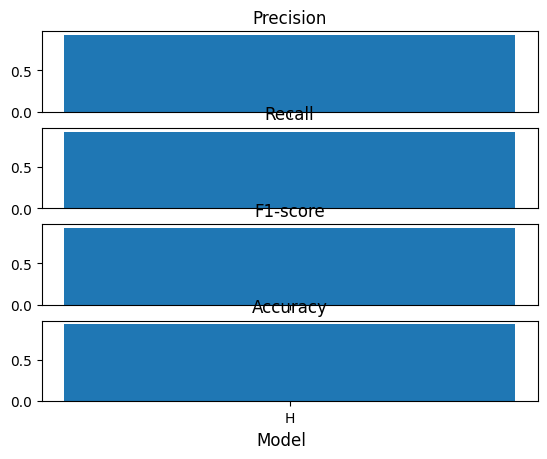

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Train the models on the selected features
for model_name, model in models.items():
    model.fit(X_train, y_train)

# Evaluate the models on the test set
classification_reports = []
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    classification_report_dict = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(classification_report_dict)

# Get the model names from the classification reports
model_names = []
for model_report in classification_reports:
    model_names.append(list(model_report.keys())[0])

# Get the performance metrics
precisions = []
recalls = []
f1_scores = []
accuracies = []

for model_report in classification_reports:
    precisions.append(model_report['weighted avg']['precision'])
    recalls.append(model_report['weighted avg']['recall'])
    f1_scores.append(model_report['weighted avg']['f1-score'])
    accuracies.append(model_report['accuracy'])

# Create a figure with four subplots
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True)

# Plot the precision scores on the first subplot
axes[0].bar(model_names, precisions, label='Precision')
axes[0].set_title('Precision')

# Plot the recall scores on the second subplot
axes[1].bar(model_names, recalls, label='Recall')
axes[1].set_title('Recall')

# Plot the F1-scores on the third subplot
axes[2].bar(model_names, f1_scores, label='F1-score')
axes[2].set_title('F1-score')

# Plot the accuracy scores on the fourth subplot
axes[3].bar(model_names, accuracies, label='Accuracy')
axes[3].set_title('Accuracy')

# Set the x-axis label for all subplots
fig.supxlabel('Model')


# Show the figure
plt.show()


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label="P")


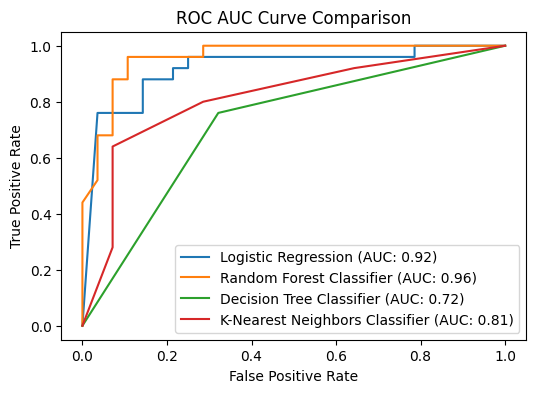

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC AUC scores for the models and store fpr, tpr for each model
roc_auc_scores = []
model_names = []
fpr_tpr_list = []  # To store fpr and tpr for each model

for model_name, model in models.items():
    model_names.append(model_name)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label="P")
    roc_auc_score = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc_score)
    fpr_tpr_list.append((fpr, tpr))

# Create a figure for the ROC AUC curve
plt.figure(figsize=(6, 4))

# Plot the ROC AUC curves for the models
for i in range(len(model_names)):
    fpr, tpr = fpr_tpr_list[i]  # Get the fpr and tpr for each model
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC: {roc_auc_scores[i]:.2f})')

# Add a title and legend to the figure
plt.title('ROC AUC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Show the figure
plt.show()


In [ ]:
!jupyter nbconvert --to html /content/Cognitive.ipynb

[NbConvertApp] Converting notebook /content/Cognitive.ipynb to html
[NbConvertApp] Writing 1753047 bytes to /content/Cognitive.html
